In [24]:
!pip install snscrape

In [25]:
! pip install celluloid

In [26]:
!pip install afinn

^C


In [ ]:
!pip install wordcloud

In [ ]:
import snscrape.modules.twitter as scpt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from celluloid import Camera
from afinn import Afinn

pd.set_option("display.max_colwidth", -1)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_3948/3330702222.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


# scraper les données 

In [ ]:
def pretty(d, indent=0):
    for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

In [ ]:
# query ="(#Ukraine) since:2022-02-24"

# tweets = []
# limits =10000
# limit_add=50

# for tweet in scpt.TwitterSearchScraper(query).get_items():

#     print(vars(tweet)) 
#     if len(tweets)==limits :
#         break
#     if len(tweets)==limit_add :
#         df = pd.DataFrame(tweets, columns = ['Date','Username','displayname','UserDescription','followersCount','friendsCount','statusesCount','favouritesCount',
#                                         'listedCount','mediaCount','location','content','replyCount','retweetCount','likeCount','quoteCount','lang','hashtags'])
#         df.to_csv('sentiments_uk.csv', mode='a', header=False)
#         tweets = []
#     else:
#         tweets.append([tweet.date, tweet.user.username,tweet.user.displayname,tweet.user.description,tweet.user.followersCount,tweet.user.friendsCount,
#                     tweet.user.statusesCount,tweet.user.favouritesCount,tweet.user.listedCount,tweet.user.mediaCount,tweet.user.location,tweet.content,
#                     tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.lang,tweet.hashtags])
    


### Methode 2 Scraping

In [ ]:
#snscrape --jsonl --progress --max-results 1000000 --since 2021-01-01 twitter-search "(#Ukraine) since:2022-02-24" > tweets_uk.json

# Mise en forme des données

In [ ]:
df=pd.read_json("tweets_uk.json",lines=True)

In [ ]:
username=[]
displayname=[]
description=[]
created=[]
location=[]
mediaCount=[]
listedCount=[]
favouritesCount=[]
statusesCount=[]
friendsCount=[]
followersCount=[]

for user in df.user:
    
    username.append(user['username'])
    displayname.append(user['displayname'])
    description.append(user['description'])
    created.append(user['created'])
    location.append(user['location'])
    mediaCount.append(user['mediaCount'])
    listedCount.append(user['listedCount'])
    favouritesCount.append(user['favouritesCount'])
    statusesCount.append(user['statusesCount'])
    friendsCount.append(user['friendsCount'])
    followersCount.append(user['followersCount'])
df['username']=username
df['displayname']=displayname
df['description']=description
df['created']=created
df['mediaCount']=mediaCount
df['listedCount']=listedCount
df['favouritesCount']=favouritesCount
df['statusesCount']=statusesCount
df['friendsCount']=friendsCount
df['followersCount']=followersCount
df['location']=location

df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
0,snscrape.modules.twitter.Tweet,https://twitter.com/MagyarIgazsag/status/1526196373867069440,2022-05-16 13:42:25+00:00,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,1526196373867069440,"{'_type': 'snscrape.modules.twitter.User', 'username': 'MagyarIgazsag', 'id': 1520424478538407937, 'displayname': 'Magyar Igazság', 'description': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. instagram.com/magyarigazsag', 'rawDescription': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. https://t.co/u1PMPop0m5', 'descriptionUrls': [{'text': 'instagram.com/magyarigazsag', 'url': 'https://www.instagram.com/magyarigazsag', 'tcourl': 'https://t.co/u1PMPop0m5', 'indices': [80, 103]}], 'verified': False, 'created': '2022-04-30T15:27:16+00:00', 'followersCount': 11, 'friendsCount': 12, 'statusesCount': 73, 'favouritesCount': 32, 'listedCount': 0, 'mediaCount': 73, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1520424690447228928/tzuuegmW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1520424478538407937/1652373626', 'label': None, 'url': 'https://twitter.com/MagyarIgazsag'}",0,0,0,...,Magyar Igazság,A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal.\n\ninstagram.com/magyarigazsag,2022-04-30T15:27:16+00:00,73,0,32,73,12,11,
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir,"Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.",2013-0

In [ ]:
# verification de valeurs manquantes
df.isna().sum().sort_values(ascending=False)

retweetedTweet      100000
cashtags            99831 
place               97333 
coordinates         97331 
inReplyToUser       85240 
inReplyToTweetId    85240 
quotedTweet         84253 
mentionedUsers      74916 
media               70255 
outlinks            56842 
tcooutlinks         56842 
hashtags            1     
listedCount         0     
mediaCount          0     
created             0     
description         0     
displayname         0     
favouritesCount     0     
statusesCount       0     
friendsCount        0     
followersCount      0     
username            0     
_type               0     
url                 0     
sourceLabel         0     
sourceUrl           0     
source              0     
lang                0     
conversationId      0     
quoteCount          0     
likeCount           0     
retweetCount        0     
replyCount          0     
user                0     
id                  0     
renderedContent     0     
content             0     
d

In [ ]:
df.drop(columns=['tcooutlinks',  'outlinks', 'media', 'mentionedUsers', 'quotedTweet', 'inReplyToTweetId', 
                 'inReplyToUser', 'coordinates', 'place', 'cashtags', 'retweetedTweet'])

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
0,snscrape.modules.twitter.Tweet,https://twitter.com/MagyarIgazsag/status/1526196373867069440,2022-05-16 13:42:25+00:00,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,1526196373867069440,"{'_type': 'snscrape.modules.twitter.User', 'username': 'MagyarIgazsag', 'id': 1520424478538407937, 'displayname': 'Magyar Igazság', 'description': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. instagram.com/magyarigazsag', 'rawDescription': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. https://t.co/u1PMPop0m5', 'descriptionUrls': [{'text': 'instagram.com/magyarigazsag', 'url': 'https://www.instagram.com/magyarigazsag', 'tcourl': 'https://t.co/u1PMPop0m5', 'indices': [80, 103]}], 'verified': False, 'created': '2022-04-30T15:27:16+00:00', 'followersCount': 11, 'friendsCount': 12, 'statusesCount': 73, 'favouritesCount': 32, 'listedCount': 0, 'mediaCount': 73, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1520424690447228928/tzuuegmW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1520424478538407937/1652373626', 'label': None, 'url': 'https://twitter.com/MagyarIgazsag'}",0,0,0,...,Magyar Igazság,A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal.\n\ninstagram.com/magyarigazsag,2022-04-30T15:27:16+00:00,73,0,32,73,12,11,
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir,"Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.",2013-0

In [ ]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'username', 'displayname',
       'description', 'created', 'mediaCount', 'listedCount',
       'favouritesCount', 'statusesCount', 'friendsCount', 'followersCount',
       'location'],
      dtype='object')

# langue la plus populaire des tweets

<AxesSubplot:>

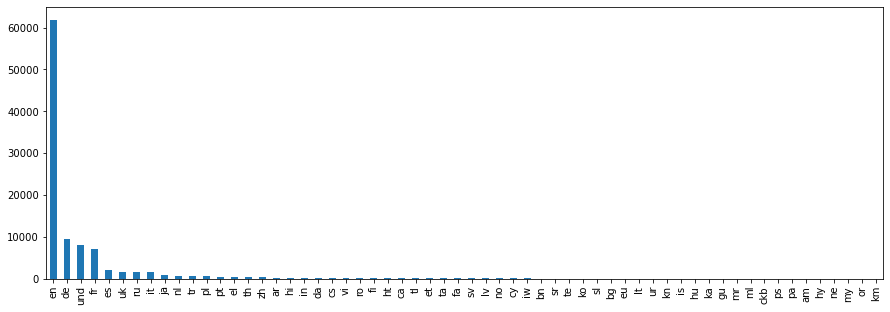

In [ ]:
plt.figure(figsize=(15,5))
df['lang'].value_counts().plot.bar()

In [ ]:
# analyse des tweets en anglais
df_en = df[df.lang == 'en'].drop('lang', axis=1)

# Localisation des utilisateurs

<AxesSubplot:>

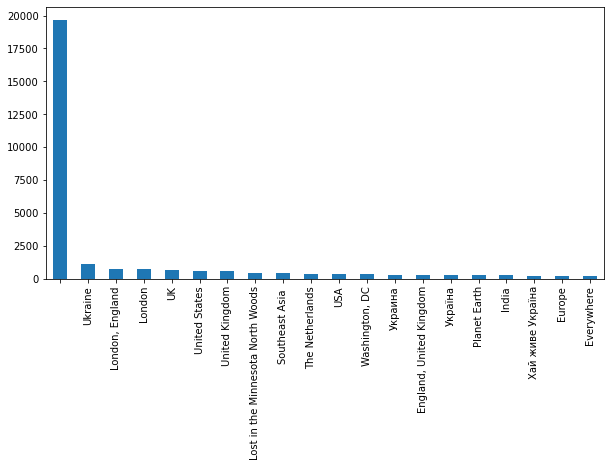

In [ ]:
plt.figure(figsize=(10,5))
df_en['location'].value_counts().iloc[:20].plot.bar()

# Analyse des sentiments 

In [ ]:
afinn = Afinn()
aff=[]
for sentence in df_en['content']:
    vs=afinn.score(sentence)
    aff.append(vs)
df_en['sentiment']=aff

In [ ]:
# creation de la colonne label (positif , neutre ou negatif)
THRESHOLD = 0.2
conditions = [
    (df_en['sentiment'] <= -THRESHOLD), 
    (df_en['sentiment'] > -THRESHOLD) & (df_en['sentiment'] < THRESHOLD),
    (df_en['sentiment'] >= THRESHOLD)
]

values = ["neg","neu", "pos"]
df_en['label'] = np.select(conditions, values)

df_en.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,2013-08-20T13:47:54+00:00,1523,60,26423,11493,4125,5900,Reykjavík,10.0,pos
3,snscrape.modules.twitter.Tweet,https://twitter.com/PILPG/status/1526196345123614720,2022-05-16 13:42:18+00:00,New speakers just announced: Join PILPG's Professor Jennifer Trahan and Ambassador Todd Buchwald this Friday for our expert roundtable on the war in #Ukraine and the role of the #UnitedNations. Learn more and register below. https://t.co/q6uJidSlYK https://t.co/r4t7b7Ix1N,New speakers just announced: Join PILPG's Professor Jennifer Trahan and Ambassador Todd Buchwald this Friday for our expert roundtable on the war in #Ukraine and the role of the #UnitedNations. Learn more and register below. twitter.com/PILPG/status/1… https://t.co/r4t7b7Ix1N,1526196345123614720,"{'_type': 'snscrape.modules.twitter.User', 'username': 'PILPG', 'id': 361360464, 'displayname': 'Public International Law & Policy Group (PILPG)', 'description': 'Public International Law & Policy Group, a global pro bono law firm specializing in peace negotiations, post-conflict constitutions, and transitional justice.', 'rawDescription': 'Public International Law & Policy Group, a global pro bono law firm specializing in peace negotiations, post-conflict constitutions, and transitional justice.', 'descriptionUrls': None, 'verified': True, 'created': '2011-08-24T17:29:56+00:00', 'followersCount': 7917, 'friendsCount': 1135, 'statusesCount': 12521, 'favouritesCount': 2370, 'listedCount': 152, 'mediaCount': 1581, 'location': '', 'protected': False, 'linkUrl': 'http://www.pilpg.org', 'linkTcourl': 'https://t.co/Zxhp9xKlE4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/646143284583206912/AS_zR_zt_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/361360464/1607456964', 'label': None, 'url': 'https://twitter.com/PILPG'}",0,0,0,...,2011-08-24T17:29:56+00:00,1581,152,2370,12521,1135,7917,,-1.0,neg
4,snscrape.modules.twitter.Tweet,https://twitter.com/ToriDi/status/1526196307542560768,2022-05-16 13:42:09+00:00,So #JoeBiden didn’t want #Ukraine to have money wh

In [ ]:
# sauvegarde des données 
# df_en.to_csv('sentiments_Uk.csv')

In [ ]:
# df_en=pd.read_csv("sentiments_Uk.csv")

In [ ]:
# df_en=df_en[100000:]
# df_en

,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
100000,169975,snscrape.modules.twitter.Tweet,https://twitter.com/Rishikesh4709/status/1521050658706956288,2022-05-02 08:55:11+00:00,eth rise yesterday bullish revers mani coin start rise best luck crypto btw ethereum lover follow crypto updat 🙂🤞cryptocurr cryptonew btc bitcoin ethereum dog elonmusk ukrain,"#ETH is rising from yesterday, It is a Bullish reversal. Many coins have started to rise. Best of luck #Crypto \nBtw, how are you Ethereum Lovers ? \n: Do follow me for more crypto updates. 🙂🤞\n#cryptocurrency #CryptoNews #BTC #Bitcoin #Ethereum #dogs #ElonMusk #Ukraine https://t.co/bFhN4asMrf",1521050658706956288,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Rishikesh4709', 'id': 1503430291591135238, 'displayname': 'Rishikesh Raj', 'description': ': Look at me; God must have a bad sense of humor!\n\n : cryptocurrency lover ❤ #BTC #ETH #DOGE #SHIB', 'rawDescription': ': Look at me; God must have a bad sense of humor!\n\n : cryptocurrency lover ❤ #BTC #ETH #DOGE #SHIB', 'descriptionUrls': None, 'verified': False, 'created': '2022-03-14T17:58:36+00:00', 'followersCount': 75, 'friendsCount': 110, 'statusesCount': 222, 'favouritesCount': 3654, 'listedCount': 2, 'mediaCount': 50, 'location': 'Dreamland', 'protected': False, 'linkUrl': 'https://instagram.com/rishikesh_1136?igshid=YmMyMTA2M2Y=', 'linkTcourl': 'https://t.co/EJHQXkE7yM', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1504879720449466368/gVXGskUW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1503430291591135238/1650371618', 'label': None, 'url': 'https://twitter.com/Rishikesh4709'}",2,0,...,2022-03-14T17:58:36+00:00,50,2,3654,222,110,75,Dreamland,8.0,pos
100001,169976,snscrape.modules.twitter.Tweet,https://twitter.com/Front_News_eu/status/1521050646845267969,2022-05-02 08:55:08+00:00,addit sourc gas ukrain get access lngtermin baltic state poland,Additional source of #gas: #Ukraine will get access to LNG-terminals of the #Baltic states and #Poland \nfrontnews.eu/en/news/detail…,1521050646845267969,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Front_News_eu', 'id': 918574273, 'displayname': 'Front News Ukraine', 'description': 'Breaking news daily\n\nConnect with us on telegram: t.me/frontnews_eu', 'rawDescription': 'Breaking news daily\n\nConnect with us on telegram: https://t.co/atfpFtvMaS', 'descriptionUrls': [{'text': 't.me/frontnews_eu', 'url': 'http://t.me/frontnews_eu', 'tcourl': 'https://t.co/atfpFtvMaS', 'indices': [50, 73]}], 'verified': False, 'created': '2012-11-01T08:50:47+00:00', 'followersCount': 1269, 'friendsCount': 8, 'statusesCount': 53594, 'favouritesCount': 221, 'listedCount': 17, 'mediaCount': 716, 'location': 'Ukraine', 'protected': False, 'linkUrl': 'https://frontnews.eu/en/', 'linkTcourl': 'https://t.co/VKuawIrZhA', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1422866001595617282/au4yv4nz_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/918574273/1502461868', 'label': None, 'url': 'https://twitter.com/Front_News_eu'}",0,0,...,2012-11-01T08:50:47+00:00,716,17,221,53594,8,1269,Ukraine,0.0,neu
100002,169977,snscrape.modules.twitter.Tweet,https://twitter.com/hrealities/status/1521050640268468224,2022-05-02 08:55:07+00:00,full interview with russia foreign minist sergey lavrov view ukrain still watch,Full interview with Russia’s Foreign Minister Sergey Lavrov youtu.be/_DwOZOaJfY4 #view #ukraine ( still watching ),1521050640268468224,"{'_type': 'snscrape.modules.twitter.User', 'username': 'hrealities', 'id': 127228163, 'displayname': 'Julia Pichler', 'description': 'Strategic Empowering Information Design #Transitioning 2 Fairness&Abundance 4ALL = #p2p… dancer@heart, obviously no online socialiser', 'rawDescription': 'Strategic Empowering Information Design #Tra

<AxesSubplot:xlabel='label', ylabel='Count'>

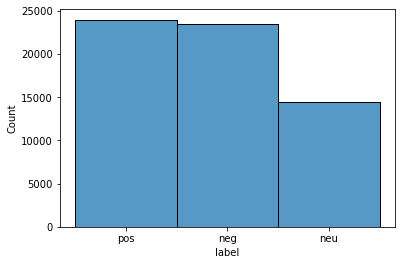

In [ ]:
# diagrame en bar des types d'avis
sns.histplot(df_en["label"])

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

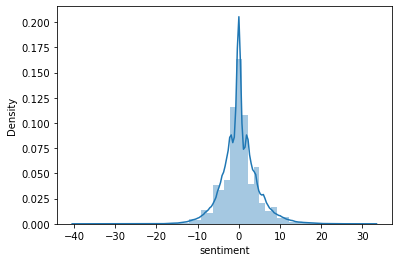

In [ ]:
# distribution des sentiments 
sns.distplot(df_en['sentiment'])

# moyenne des sentiment de la population mondial

In [ ]:
df_en.sentiment.mean()

0.21889348768026903

# tweet le plus retweeté 

In [ ]:
sorted_tweets = df_en.sort_values(by = 'retweetCount', ascending=False)
most_retweeted = sorted_tweets.iloc[0]
phrase=df.content[(df['date']==most_retweeted['date']) & (df['username']==most_retweeted['username'])]
phrase = " ".join(phrase)
print('*'+'-'*30+'Tweet'+'-'*30+'*')
print(phrase)
print('*'+'-'*30+'Details du Tweet'+'-'*30+'*')
print(most_retweeted)

*------------------------------Tweet------------------------------*
“Mr. President, we reached Ukraine’s state border with the enemy state.  Mr. President, we made it!”

Glory to #Ukraine! Glory to Heroes!

#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar

 https://t.co/kdD6kD1w3x
*------------------------------Details du Tweet------------------------------*
_type               snscrape.modules.twitter.Tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# top 10 Tweet Retweeté 

<AxesSubplot:xlabel='username'>

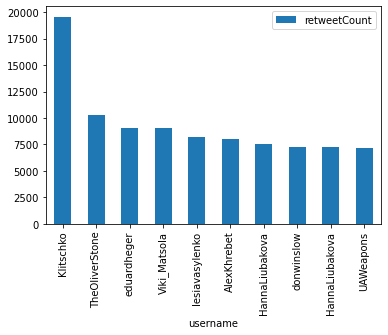

In [ ]:
sorted_tweets.head(10).plot.bar(y='retweetCount',x='username')

In [ ]:
sorted_tweets.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
997237,snscrape.modules.twitter.Tweet,https://twitter.com/Klitschko/status/1510631109750673409,2022-04-03 14:51:37+00:00,genocidegenocid freeukrain standwithukrain stopthewar ukrain,This is Genocide.\n\n#Genocide #FreeUkraine #StandWithUkraine #StopTheWar #Ukraine https://t.co/NfLePlWhIl,1510631109750673409,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Klitschko', 'id': 18869484, 'displayname': 'Klitschko', 'description': '#StayLoud & #ActNow: Find out how below ⬇️🔗', 'rawDescription': '#StayLoud & #ActNow: Find out how below ⬇️🔗', 'descriptionUrls': None, 'verified': True, 'created': '2009-01-11T15:30:50+00:00', 'followersCount': 802731, 'friendsCount': 299, 'statusesCount': 3526, 'favouritesCount': 6550, 'listedCount': 2596, 'mediaCount': 900, 'location': '', 'protected': False, 'linkUrl': 'https://www.weareallukrainians.de/en/home/', 'linkTcourl': 'https://t.co/iFnq1teO7L', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1315602196650754051/DtzBbyX4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/18869484/1645889570', 'label': None, 'url': 'https://twitter.com/Klitschko'}",1523,19570,59429,...,2009-01-11T15:30:50+00:00,900,2596,6550,3526,299,802731,,0.0,neu
615162,snscrape.modules.twitter.Tweet,https://twitter.com/TheOliverStone/status/1514645900970409984,2022-04-14 16:44:58+00:00,believ read media someth chew report jacquesbaud retir colonel swiss intellig serv ukrain nato train oper imparti sourc,"(1/4) For those of you who believe what you read in the media, here is something to chew on: The reporter, #JacquesBaud, a retired Colonel in Swiss Intelligence who served in #Ukraine in #NATO training operations, is an impartial source. bit.ly/36cT8vg",1514645900970409984,"{'_type': 'snscrape.modules.twitter.User', 'username': 'TheOliverStone', 'id': 538021652, 'displayname': 'Oliver Stone', 'description': 'Award-winning director, producer, screenwriter. JFK Revisited, Snowden, Savages, Untold History, Platoon, Wall Street, JFK. Chasing the Light available now.', 'rawDescription': 'Award-winning director, producer, screenwriter. JFK Revisited, Snowden, Savages, Untold History, Platoon, Wall Street, JFK. Chasing the Light available now.', 'descriptionUrls': None, 'verified': True, 'created': '2012-03-27T09:41:46+00:00', 'followersCount': 223186, 'friendsCount': 458, 'statusesCount': 2221, 'favouritesCount': 4706, 'listedCount': 2053, 'mediaCount': 305, 'location': 'Los Angeles', 'protected': False, 'linkUrl': 'https://linktr.ee/OStone', 'linkTcourl': 'https://t.co/CMBAD78al0', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/378800000834569212/6f5842c4f37a75947ef9f334f6f56876_normal.jpeg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/538021652/1596043926', 'label': None, 'url': 'https://twitter.com/TheOliverStone'}",886,10255,18447,...,2012-03-27T09:41:46+00:00,305,2053,4706,2221,458,223186,Los Angeles,0.0,neu
815099,snscrape.modules.twitter.Tweet,https://twitter.com/eduardheger/status/1512386024399376389,2022-04-08 11:05:01+00:00,would like confirm slovakia provid ukrain airdef system ukrainian nation brave defend sovereign countri us duti help stay put ignor loss human live russia agress,"I would like to confirm that #Slovakia has provided #Ukraine with an air-defence system S-300. #Ukrainian nation is #bravely defending its sovereign country and us too. It is our duty to help, not to stay put and be ignorant to the loss of human lives under #Russia’s agression.",1512386024399376389,"{'_type': 'snscrape.modules.twitter.User', 'username': 'eduardheger', 'id': 962820603995672577, 'displayname': 'Eduard Heger', 'description': 'Prime Minister of the Slovak Republic 🇸🇰', 'rawDescription': 'Prime Minister of the Slovak Republic 🇸🇰', 'descriptionUrls': None, 'verified': Tr

# tweet les plus cités par les utilisateurs (quotecount)

In [ ]:
sorted_tweets_quote = df_en.sort_values(by = 'quoteCount', ascending=False)

<AxesSubplot:xlabel='username'>

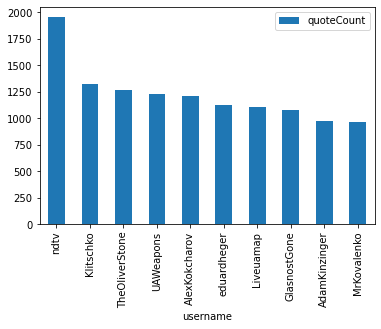

In [ ]:
sorted_tweets_quote.head(10).plot.bar(y='quoteCount',x='username')

In [ ]:
sorted_tweets_quote.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
800059,snscrape.modules.twitter.Tweet,https://twitter.com/ndtv/status/1512489069154279424,2022-04-08 17:54:29+00:00,priyankachopra appeal amid ukrain crisi cant stand watch,"#PriyankaChopra's Appeal Amid #Ukraine Crisis: ""We Can't Stand By And Watch"" ndtv.com/world-news/pri… https://t.co/XzGKFOLLT8",1512489069154279424,"{'_type': 'snscrape.modules.twitter.User', 'username': 'ndtv', 'id': 37034483, 'displayname': 'NDTV', 'description': 'Breaking news alerts from India. Instagram: instagram.com/ndtv YouTube: youtube.com/ndtv', 'rawDescription': 'Breaking news alerts from India. Instagram: https://t.co/QrV2OUzOYo YouTube: https://t.co/INzHBLFd1l', 'descriptionUrls': [{'text': 'instagram.com/ndtv', 'url': 'http://instagram.com/ndtv', 'tcourl': 'https://t.co/QrV2OUzOYo', 'indices': [45, 68]}, {'text': 'youtube.com/ndtv', 'url': 'http://youtube.com/ndtv', 'tcourl': 'https://t.co/INzHBLFd1l', 'indices': [78, 101]}], 'verified': True, 'created': '2009-05-01T20:34:48+00:00', 'followersCount': 17063959, 'friendsCount': 14, 'statusesCount': 937191, 'favouritesCount': 0, 'listedCount': 0, 'mediaCount': 471058, 'location': 'India', 'protected': False, 'linkUrl': 'http://www.ndtv.com/', 'linkTcourl': 'https://t.co/KFTuQYp7En', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/570440108424171520/QuGYd7jH_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/37034483/1636163355', 'label': None, 'url': 'https://twitter.com/ndtv'}",2162,673,3301,...,2009-05-01T20:34:48+00:00,471058,0,0,937191,14,17063959,India,0.0,neu
997237,snscrape.modules.twitter.Tweet,https://twitter.com/Klitschko/status/1510631109750673409,2022-04-03 14:51:37+00:00,genocidegenocid freeukrain standwithukrain stopthewar ukrain,This is Genocide.\n\n#Genocide #FreeUkraine #StandWithUkraine #StopTheWar #Ukraine https://t.co/NfLePlWhIl,1510631109750673409,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Klitschko', 'id': 18869484, 'displayname': 'Klitschko', 'description': '#StayLoud & #ActNow: Find out how below ⬇️🔗', 'rawDescription': '#StayLoud & #ActNow: Find out how below ⬇️🔗', 'descriptionUrls': None, 'verified': True, 'created': '2009-01-11T15:30:50+00:00', 'followersCount': 802731, 'friendsCount': 299, 'statusesCount': 3526, 'favouritesCount': 6550, 'listedCount': 2596, 'mediaCount': 900, 'location': '', 'protected': False, 'linkUrl': 'https://www.weareallukrainians.de/en/home/', 'linkTcourl': 'https://t.co/iFnq1teO7L', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1315602196650754051/DtzBbyX4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/18869484/1645889570', 'label': None, 'url': 'https://twitter.com/Klitschko'}",1523,19570,59429,...,2009-01-11T15:30:50+00:00,900,2596,6550,3526,299,802731,,0.0,neu
615162,snscrape.modules.twitter.Tweet,https://twitter.com/TheOliverStone/status/1514645900970409984,2022-04-14 16:44:58+00:00,believ read media someth chew report jacquesbaud retir colonel swiss intellig serv ukrain nato train oper imparti sourc,"(1/4) For those of you who believe what you read in the media, here is something to chew on: The reporter, #JacquesBaud, a retired Colonel in Swiss Intelligence who served in #Ukraine in #NATO training operations, is an impartial source. bit.ly/36cT8vg",1514645900970409984,"{'_type': 'snscrape.modules.twitter.User', 'username': 'TheOliverStone', 'id': 538021652, 'displayname': 'Oliver Stone', 'description': 'Award-winning director, producer, screenwriter. JFK Revisited, Snowden, Savages, Untold History, Platoon, Wall Street, JFK. Chasing the Light available now.', 'rawDescription': 'Award-winning director, producer, screenwriter. JFK Revisited, Snowden, Savages, Untold History, Platoon, Wall Street, JFK. Chasing the Light available now.', 'descriptionUrls': None, 've

# tweets les plus commentés 

In [ ]:
sorted_tweets_reply = df_en.sort_values(by = 'replyCount', ascending=False)

<AxesSubplot:xlabel='username'>

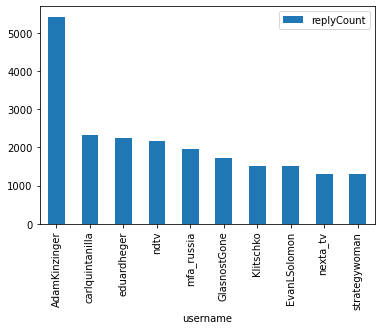

In [ ]:
sorted_tweets_reply.head(10).plot.bar(y='replyCount',x='username')

In [ ]:
sorted_tweets_reply.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
635094,snscrape.modules.twitter.Tweet,https://twitter.com/AdamKinzinger/status/1514400053724684289,2022-04-14 00:28:03+00:00,arriv wolverin ukrain reddawn,It arrived. #wolverines #ukraine #reddawn https://t.co/gYt8yCsfGq,1514400053724684289,"{'_type': 'snscrape.modules.twitter.User', 'username': 'AdamKinzinger', 'id': 18004222, 'displayname': 'Adam Kinzinger', 'description': 'Lt. Colonel, pilot, serving in the @AirNatlGuard. Aggressively calling out conspiracy theories, early and often. I am now blocking Russian bots,', 'rawDescription': 'Lt. Colonel, pilot, serving in the @AirNatlGuard. Aggressively calling out conspiracy theories, early and often. I am now blocking Russian bots,', 'descriptionUrls': None, 'verified': True, 'created': '2008-12-09T22:09:35+00:00', 'followersCount': 470091, 'friendsCount': 905, 'statusesCount': 4338, 'favouritesCount': 859, 'listedCount': 1419, 'mediaCount': 518, 'location': 'Channahon, IL', 'protected': False, 'linkUrl': 'http://www.country1st.com', 'linkTcourl': 'https://t.co/1ZasAMeUrl', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1408461462788509704/7BaqW5pH_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/18004222/1618670319', 'label': None, 'url': 'https://twitter.com/AdamKinzinger'}",5419,2676,40049,...,2008-12-09T22:09:35+00:00,518,1419,859,4338,905,470091,"Channahon, IL",0.0,neu
900005,snscrape.modules.twitter.Tweet,https://twitter.com/carlquintanilla/status/1511507866477338636,2022-04-06 00:55:32+00:00,“our data scienc team track casualti loss associ russiaukrain war ukrain lost tank equip armament armi rapid depleting i sure well known fact” fundstrat,"“Our data science team .. has been tracking the casualties and losses associated with the Russia-Ukraine war. .. #Ukraine has lost 1,969 tanks, or 91% of its equipment .. the armament of that army is rapidly depleting. I am not sure if this is a well known fact.”\n\n- @fundstrat https://t.co/rUALOhLDyU",1511507866477338636,"{'_type': 'snscrape.modules.twitter.User', 'username': 'carlquintanilla', 'id': 114782468, 'displayname': 'Carl Quintanilla', 'description': '20+ years @CNBC & @NBCNews / Peabody Award, Emmy, Murrow & duPont winner / @WSJ alum / Board member, @NYCityCenter', 'rawDescription': '20+ years @CNBC & @NBCNews / Peabody Award, Emmy, Murrow & duPont winner / @WSJ alum / Board member, @NYCityCenter', 'descriptionUrls': None, 'verified': True, 'created': '2010-02-16T15:59:04+00:00', 'followersCount': 359725, 'friendsCount': 5566, 'statusesCount': 105316, 'favouritesCount': 3070, 'listedCount': 5272, 'mediaCount': 18072, 'location': 'NYC ', 'protected': False, 'linkUrl': 'https://www.cnbc.com/carl-quintanilla/', 'linkTcourl': 'https://t.co/CHozTuBfc5', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1214244686786965510/OAxLuUGH_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/114782468/1652133083', 'label': None, 'url': 'https://twitter.com/carlquintanilla'}",2321,886,2036,...,2010-02-16T15:59:04+00:00,18072,5272,3070,105316,5566,359725,NYC,-8.0,neg
815099,snscrape.modules.twitter.Tweet,https://twitter.com/eduardheger/status/1512386024399376389,2022-04-08 11:05:01+00:00,would like confirm slovakia provid ukrain airdef system ukrainian nation brave defend sovereign countri us duti help stay put ignor loss human live russia agress,"I would like to confirm that #Slovakia has provided #Ukraine with an air-defence system S-300. #Ukrainian nation is #bravely defending its sovereign country and us too. It is our duty to help, not to stay put and be ignorant to the loss of human lives under #Russia’s agression.",1512386024399376389,"{'_type': 'snscrape.modules.twitter.User', 'username': 'eduardheger', 'id': 962820603995672577, 'displayname': 'Eduard Heger', 'description':

# compte le plus liké

In [ ]:
sorted_tweets_like = df_en.sort_values(by = 'likeCount', ascending=False)

<AxesSubplot:xlabel='username'>

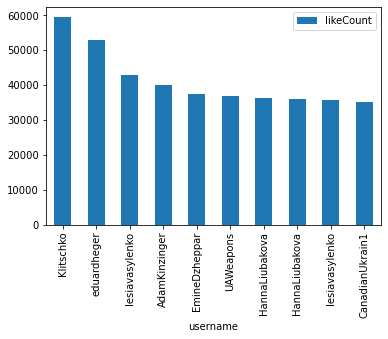

In [ ]:
sorted_tweets_like.head(10).plot.bar(y='likeCount',x='username')

In [ ]:
sorted_tweets_like.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
997237,snscrape.modules.twitter.Tweet,https://twitter.com/Klitschko/status/1510631109750673409,2022-04-03 14:51:37+00:00,genocidegenocid freeukrain standwithukrain stopthewar ukrain,This is Genocide.\n\n#Genocide #FreeUkraine #StandWithUkraine #StopTheWar #Ukraine https://t.co/NfLePlWhIl,1510631109750673409,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Klitschko', 'id': 18869484, 'displayname': 'Klitschko', 'description': '#StayLoud & #ActNow: Find out how below ⬇️🔗', 'rawDescription': '#StayLoud & #ActNow: Find out how below ⬇️🔗', 'descriptionUrls': None, 'verified': True, 'created': '2009-01-11T15:30:50+00:00', 'followersCount': 802731, 'friendsCount': 299, 'statusesCount': 3526, 'favouritesCount': 6550, 'listedCount': 2596, 'mediaCount': 900, 'location': '', 'protected': False, 'linkUrl': 'https://www.weareallukrainians.de/en/home/', 'linkTcourl': 'https://t.co/iFnq1teO7L', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1315602196650754051/DtzBbyX4_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/18869484/1645889570', 'label': None, 'url': 'https://twitter.com/Klitschko'}",1523,19570,59429,...,2009-01-11T15:30:50+00:00,900,2596,6550,3526,299,802731,,0.0,neu
815099,snscrape.modules.twitter.Tweet,https://twitter.com/eduardheger/status/1512386024399376389,2022-04-08 11:05:01+00:00,would like confirm slovakia provid ukrain airdef system ukrainian nation brave defend sovereign countri us duti help stay put ignor loss human live russia agress,"I would like to confirm that #Slovakia has provided #Ukraine with an air-defence system S-300. #Ukrainian nation is #bravely defending its sovereign country and us too. It is our duty to help, not to stay put and be ignorant to the loss of human lives under #Russia’s agression.",1512386024399376389,"{'_type': 'snscrape.modules.twitter.User', 'username': 'eduardheger', 'id': 962820603995672577, 'displayname': 'Eduard Heger', 'description': 'Prime Minister of the Slovak Republic 🇸🇰', 'rawDescription': 'Prime Minister of the Slovak Republic 🇸🇰', 'descriptionUrls': None, 'verified': True, 'created': '2018-02-11T22:48:15+00:00', 'followersCount': 23486, 'friendsCount': 138, 'statusesCount': 275, 'favouritesCount': 4, 'listedCount': 206, 'mediaCount': 136, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1377722419457236994/Lqv8nTA2_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/962820603995672577/1619637757', 'label': None, 'url': 'https://twitter.com/eduardheger'}",2238,9097,52967,...,2018-02-11T22:48:15+00:00,136,206,4,275,138,23486,,3.0,pos
547281,snscrape.modules.twitter.Tweet,https://twitter.com/lesiavasylenko/status/1515679671752474625,2022-04-17 13:12:48+00:00,sanction work russia longer buy compon anti air missil system buk similar product level fall close zero eventu reduc attack ukrain sanction must keep go,Sanctions work! #Russia can no longer buy components for anti air missile systems Buk and similar. Production levels fall close to zero. Eventually this will reduce attacks on #Ukraine. But the sanctions must keep going https://t.co/xpSStLcGqo,1515679671752474625,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lesiavasylenko', 'id': 1219232377605644289, 'displayname': 'Lesia Vasylenko', 'description': 'Ukrainian MP, @goloszmin, working mom of 3 lovely humans, lover of freedom, travel and all things green #Ukraine #geopolitics', 'rawDescription': 'Ukrainian MP, @goloszmin, working mom of 3 lovely humans, lover of freedom, travel and all things green #Ukraine #geopolitics', 'descriptionUrls': None, 'verified': True, 'created': '2020-01-20T12:17:30+00:00', 'followersCount': 291580, 'friendsCount': 272, 'statusesCount': 1542, 'favouri

# compte le plus suivi

In [ ]:
sorted_tweets_followers = df_en.sort_values(by = 'followersCount', ascending=False)

<AxesSubplot:xlabel='username'>

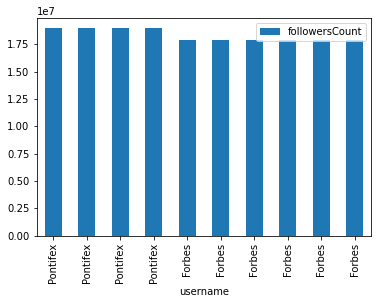

In [ ]:
sorted_tweets_followers.head(10).plot.bar(y='followersCount',x='username')

In [ ]:
sorted_tweets_followers

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
963243,snscrape.modules.twitter.Tweet,https://twitter.com/Pontifex/status/1510938983697584130,2022-04-04 11:15:00+00:00,logic war impos yet longer use think logic peac stubborn love war spirit cain peac ukrain,"The logic of war has imposed itself yet again because we are no longer used to thinking with the logic of peace. We are stubborn, we are in love with war, with the spirit of Cain. #Peace #Ukraine",1510938983697584130,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Pontifex', 'id': 500704345, 'displayname': 'Pope Francis', 'description': 'Welcome to the official Twitter page of His Holiness Pope Francis', 'rawDescription': 'Welcome to the official Twitter page of His Holiness Pope Francis', 'descriptionUrls': None, 'verified': True, 'created': '2012-02-23T11:38:07+00:00', 'followersCount': 18953460, 'friendsCount': 8, 'statusesCount': 4075, 'favouritesCount': 0, 'listedCount': 24109, 'mediaCount': 200, 'location': 'Vatican City', 'protected': False, 'linkUrl': 'http://www.vaticannews.va', 'linkTcourl': 'https://t.co/yRhGwps83P', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/507818066814590976/KNG-IkT9_normal.jpeg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/500704345/1409908226', 'label': None, 'url': 'https://twitter.com/Pontifex'}",303,1434,8929,...,2012-02-23T11:38:07+00:00,200,24109,0,4075,8,18953460,Vatican City,-2.0,neg
962784,snscrape.modules.twitter.Tweet,https://twitter.com/Pontifex/status/1510942761381367809,2022-04-04 11:30:00+00:00,need cri tomb dont youth matter griev happen today never learn may lord merci us us everi one us guilti peac ukrain,"We need to cry over their tombs. Don't our youth matter? I am grieved by what is happening today. We never learn. May the Lord have mercy on us, on all of us. Every one of us are guilty! #Peace #Ukraine",1510942761381367809,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Pontifex', 'id': 500704345, 'displayname': 'Pope Francis', 'description': 'Welcome to the official Twitter page of His Holiness Pope Francis', 'rawDescription': 'Welcome to the official Twitter page of His Holiness Pope Francis', 'descriptionUrls': None, 'verified': True, 'created': '2012-02-23T11:38:07+00:00', 'followersCount': 18953460, 'friendsCount': 8, 'statusesCount': 4075, 'favouritesCount': 0, 'listedCount': 24109, 'mediaCount': 200, 'location': 'Vatican City', 'protected': False, 'linkUrl': 'http://www.vaticannews.va', 'linkTcourl': 'https://t.co/yRhGwps83P', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/507818066814590976/KNG-IkT9_normal.jpeg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/500704345/1409908226', 'label': None, 'url': 'https://twitter.com/Pontifex'}",860,2762,19018,...,2012-02-23T11:38:07+00:00,200,24109,0,4075,8,18953460,Vatican City,1.0,pos
880345,snscrape.modules.twitter.Tweet,https://twitter.com/Pontifex/status/1511697238581518340,2022-04-06 13:28:02+00:00,recent news ukrain report new atroc like massacr bucha ever horrend cruelti done even defenseless civilian women children,"The recent news from #Ukraine, reports new atrocities, like the massacre in Bucha: ever more horrendous cruelty done even against defenseless civilians, women and children.",1511697238581518340,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Pontifex', 'id': 500704345, 'displayname': 'Pope Francis', 'description': 'Welcome to the official Twitter page of His Holiness Pope Francis', 'rawDescription': 'Welcome to the official Twitter page of His Holiness Pope Francis', 'descriptionUrls': None, 'verified': True, 'created': '2012-02-23T11:38:07+00:00', 'followersCount': 18953419, 'friendsCount': 8, 'statusesCount': 4075, 'favouritesCount': 0, 'listedCount': 24109, 'mediaCount': 200, 'location': 'Vatican City', 'protected': False,

# compte qui a le plus d'amis

In [ ]:
sorted_tweets_friends = df_en.sort_values(by = 'friendsCount', ascending=False)

<AxesSubplot:xlabel='username'>

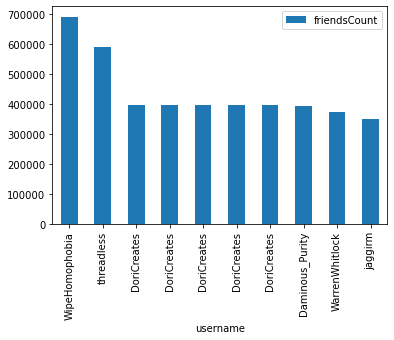

In [ ]:
sorted_tweets_friends.head(10).plot.bar(y='friendsCount',x='username')

In [ ]:
sorted_tweets_friends.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
127738,snscrape.modules.twitter.Tweet,https://twitter.com/WipeHomophobia/status/1521761593968762881,2022-05-04 08:00:11+00:00,day eurovis norway excel still want ukrain win though,10 days until #Eurovision2022 #Eurovision and #Norway have excelled!!! I still want #Ukraine to win though !!! https://t.co/ox2tOCDugL,1521761593968762881,"{'_type': 'snscrape.modules.twitter.User', 'username': 'WipeHomophobia', 'id': 606412878, 'displayname': 'Kev & Trev 🇺🇦 🇬🇧 🏳️‍🌈', 'description': 'Rebel without a corset and 5 year old #FrenchBulldog @TrevorLeWoof Newcastle, UK. Buy a tee lgbttees.creator-spring.com if you can. 🇺🇦 🇬🇧 🏳️‍🌈', 'rawDescription': 'Rebel without a corset and 5 year old #FrenchBulldog @TrevorLeWoof Newcastle, UK. Buy a tee https://t.co/NXIa6BAzkX if you can. 🇺🇦 🇬🇧 🏳️‍🌈', 'descriptionUrls': [{'text': 'lgbttees.creator-spring.com', 'url': 'https://lgbttees.creator-spring.com', 'tcourl': 'https://t.co/NXIa6BAzkX', 'indices': [92, 115]}], 'verified': True, 'created': '2012-06-12T13:48:29+00:00', 'followersCount': 709469, 'friendsCount': 692062, 'statusesCount': 22318, 'favouritesCount': 205954, 'listedCount': 2201, 'mediaCount': 16866, 'location': 'North East, England', 'protected': False, 'linkUrl': 'https://lgbttees.myteespring.co', 'linkTcourl': 'https://t.co/GIyQFOrKTY', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1477413242930700294/gu5oKHTc_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/606412878/1641078238', 'label': None, 'url': 'https://twitter.com/WipeHomophobia'}",1,0,16,...,2012-06-12T13:48:29+00:00,16866,2201,205954,22318,692062,709469,"North East, England",5.0,pos
429107,snscrape.modules.twitter.Tweet,https://twitter.com/threadless/status/1517222678339502082,2022-04-21 19:24:09+00:00,new blog 👉how help ukrain talk artist mykhailo skop,New on the blog 👉How We Can All Help #Ukraine: Our Talk with Artist Mykhailo Skop blog.threadless.com/how-we-can-all…,1517222678339502082,"{'_type': 'snscrape.modules.twitter.User', 'username': 'threadless', 'id': 5380672, 'displayname': 'threadless', 'description': '👕 Unique designs by the Threadless artist community. 🛍 Need help with an order? → @threadhelp 🎨 Want to sell your art online? → artistshops.com', 'rawDescription': '👕 Unique designs by the Threadless artist community. 🛍 Need help with an order? → @threadhelp 🎨 Want to sell your art online? → https://t.co/MdimpQBafU', 'descriptionUrls': [{'text': 'artistshops.com', 'url': 'http://artistshops.com', 'tcourl': 'https://t.co/MdimpQBafU', 'indices': [128, 151]}], 'verified': True, 'created': '2007-04-21T14:52:55+00:00', 'followersCount': 1730222, 'friendsCount': 591912, 'statusesCount': 33565, 'favouritesCount': 37636, 'listedCount': 8080, 'mediaCount': 9929, 'location': 'Chicago, IL', 'protected': False, 'linkUrl': 'https://www.threadless.com', 'linkTcourl': 'https://t.co/Ha6kryLM8o', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1506675343985463311/BEDc8Ge9_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/5380672/1648054370', 'label': None, 'url': 'https://twitter.com/threadless'}",0,0,2,...,2007-04-21T14:52:55+00:00,9929,8080,37636,33565,591912,1730222,"Chicago, IL",2.0,pos
873090,snscrape.modules.twitter.Tweet,https://twitter.com/DoriCreates/status/1511754299889512448,2022-04-06 17:14:46+00:00,mani peopl begin rebuild live war torn ukrain amp ethiopia divorc final loss life earth fire around world proceed faithpleas find hope process renew ask help god jesus 💞 angel,"Many people are beginning to rebuild their lives. From war torn #Ukraine &amp; #Ethiopia. From divorce and the finality of loss of life on earth. From fires around the world, proceed in #faith.Please find #hope in your process of renewal. Ask for the help of God, Jesus, 💞 #Angels",1511754299

# utilisateur qui à liké le plus grand nombre de tweet 

In [ ]:
sorted_tweets_favourites = df_en.sort_values(by = 'favouritesCount', ascending=False)

<AxesSubplot:xlabel='username'>

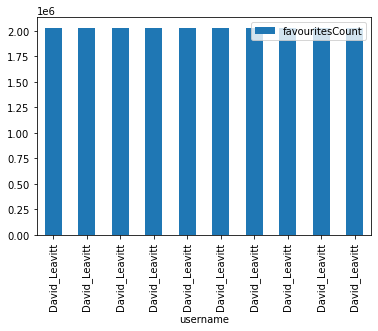

In [ ]:
sorted_tweets_favourites.head(10).plot.bar(y='favouritesCount',x='username')

In [ ]:
sorted_tweets_favourites.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
641947,snscrape.modules.twitter.Tweet,https://twitter.com/David_Leavitt/status/1514326213321445381,2022-04-13 19:34:38+00:00,“how suppos tell mother father anymore”bi refus stop busi activ russia hasbrowizardsmagicmtgarena allow russia war aggress europ continu warcrim ukrain mtgnewcapenna,"“How am I supposed to tell her she has no mother and father anymore?”\n\nBy refusing to stop business activities in Russia, @Hasbro/@Wizards_Magic/@MTG_Arena allows #Russia’s war of aggression in Europe to continue. \n\n#WarCrimes #Ukraine #mtgNewCapenna \n\nhttps://t.co/OBvvIqNDpp",1514326213321445381,"{'_type': 'snscrape.modules.twitter.User', 'username': 'David_Leavitt', 'id': 63514682, 'displayname': 'David Leavitt', 'description': 'Award-Winning Multimedia Journalist. Bylines: CBS, AXS, Yahoo, Examiner, etc. I love #Games. Casual #MTG & #Boardgames player. Work w/me: DavidLeavitt@gmail.com', 'rawDescription': 'Award-Winning Multimedia Journalist. Bylines: CBS, AXS, Yahoo, Examiner, etc. I love #Games. Casual #MTG & #Boardgames player. Work w/me: DavidLeavitt@gmail.com', 'descriptionUrls': None, 'verified': True, 'created': '2009-08-06T19:23:18+00:00', 'followersCount': 306080, 'friendsCount': 10968, 'statusesCount': 49305, 'favouritesCount': 2030476, 'listedCount': 1922, 'mediaCount': 10214, 'location': 'Social distancing', 'protected': False, 'linkUrl': 'https://www.instagram.com/davidleavitt', 'linkTcourl': 'https://t.co/un643i7qRC', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1398431150343954433/WS1favdQ_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/63514682/1511908767', 'label': None, 'url': 'https://twitter.com/David_Leavitt'}",7,49,89,...,2009-08-06T19:23:18+00:00,10214,1922,2030476,49305,10968,306080,Social distancing,-2.0,neg
715985,snscrape.modules.twitter.Tweet,https://twitter.com/David_Leavitt/status/1513546819002900483,2022-04-11 15:57:36+00:00,refus stop busi activ russia hasbrowizardsmagicmtgarena allow russia war aggress europ continu longterm damag compani reput proportion scale russian warcrim ukrain enorm mtgarena bucha,"By refusing to stop business activities in Russia, @Hasbro/@Wizards_Magic/@MTG_Arena allows #Russia’s war of aggression in Europe to continue. Long-term damage to the company’s reputation is proportionate to the scale of Russian #WarCrimes in #Ukraine (enormous) #MTGArena #Bucha twitter.com/David_Leavitt/… https://t.co/6rIZnDaQvT",1513546819002900483,"{'_type': 'snscrape.modules.twitter.User', 'username': 'David_Leavitt', 'id': 63514682, 'displayname': 'David Leavitt', 'description': 'Award-Winning Multimedia Journalist. Bylines: CBS, AXS, Yahoo, Examiner, etc. I love #Games. Casual #MTG & #Boardgames player. Work w/me: DavidLeavitt@gmail.com', 'rawDescription': 'Award-Winning Multimedia Journalist. Bylines: CBS, AXS, Yahoo, Examiner, etc. I love #Games. Casual #MTG & #Boardgames player. Work w/me: DavidLeavitt@gmail.com', 'descriptionUrls': None, 'verified': True, 'created': '2009-08-06T19:23:18+00:00', 'followersCount': 306079, 'friendsCount': 10938, 'statusesCount': 49305, 'favouritesCount': 2030470, 'listedCount': 1922, 'mediaCount': 10214, 'location': 'Social distancing', 'protected': False, 'linkUrl': 'https://www.instagram.com/davidleavitt', 'linkTcourl': 'https://t.co/un643i7qRC', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1398431150343954433/WS1favdQ_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/63514682/1511908767', 'label': None, 'url': 'https://twitter.com/David_Leavitt'}",8,62,114,...,2009-08-06T19:23:18+00:00,10214,1922,2030470,49305,10938,306079,Social distancing,-2.0,neg
802102,snscrape.modules.twitter.Tweet,https://twitter.com/David_Leavitt/status/1512475173160722432,2022-04-08 16:59:16+00:00,ukrainian soldier 

# utilisateurs possedant le plus grand nombre de tweets

In [ ]:
df_en.username.value_counts()

UKRWarSitRep       5205
KabalexChild       3517
knittingknots      2885
RisksAssociated    2692
Majid52333133      2302
                   ... 
GA_prod_voz        1   
ZeliaLH            1   
silvanamesay       1   
PICT_ASX           1   
GerardoBerthin     1   
Name: username, Length: 109447, dtype: int64

# sentiments des russes 

# preparation des données pour le wordcloud

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_en["content"] = df_en["content"].apply(clean)

# wordcloud de tous les tweets

In [ ]:
text = " ".join(i for i in df_en.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets negatif

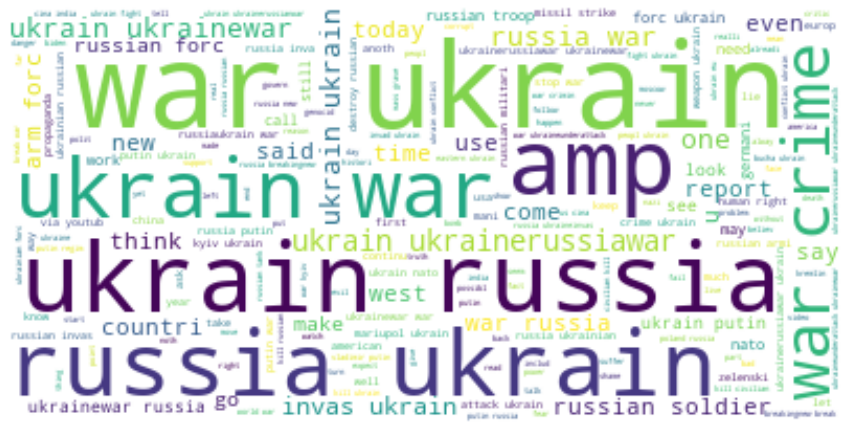

In [ ]:
negative =' '.join([i for i in df_en['content'][df_en['sentiment'] < 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets positifs

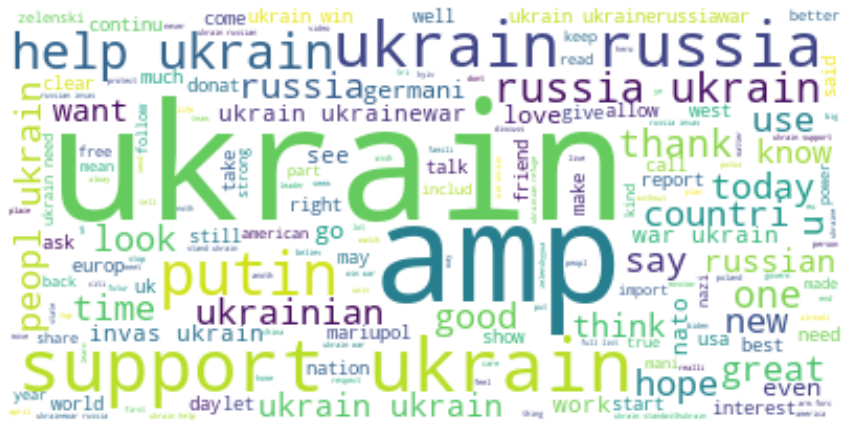

In [ ]:
positif =' '.join([i for i in df_en['content'][df_en['sentiment'] > 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positif)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets neutres

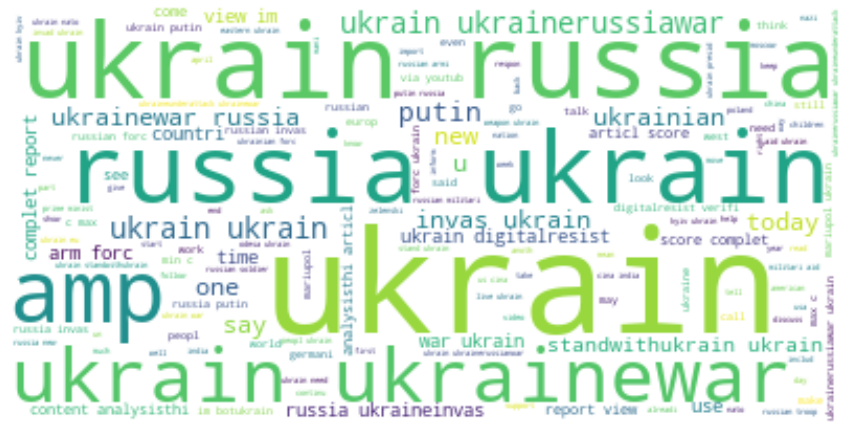

In [ ]:
neutre =' '.join([i for i in df_en['content'][df_en['sentiment'] == 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neutre)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyse Hashtags

In [ ]:
hashtags = [item for l in df['hashtags'].dropna() for item in l]
hashtags

hashtags_Positifs=[item for l in df_en['hashtags'][df_en['sentiment']>0].dropna() for item in l]
hashtags_Negatifs=[item for l in df_en['hashtags'][df_en['sentiment']<0].dropna() for item in l]

In [ ]:
topXItem = 10
from collections import Counter

x_hashtags = Counter(hashtags)
x_hashtags_Positifs = Counter(hashtags_Positifs)
x_hashtags_Negatifs = Counter(hashtags_Negatifs)

topXItemList_hashtags = x_hashtags.most_common(topXItem)
topXItemList_hashtags_Positifs = x_hashtags_Positifs.most_common(topXItem)
topXItemList_hashtags_Negatifs = x_hashtags_Negatifs.most_common(topXItem)

<AxesSubplot:xlabel='Hashtag'>

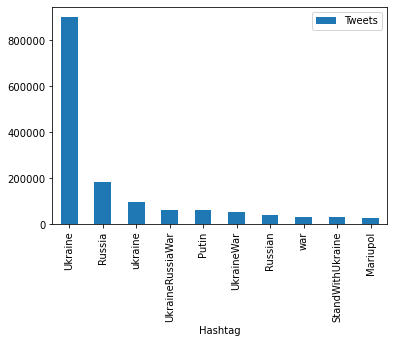

In [ ]:
df_hash = pd.DataFrame(topXItemList_hashtags)
df_hash.columns =['Hashtag','Tweets']
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)


## Hashtag positifs

<AxesSubplot:xlabel='Hashtag'>

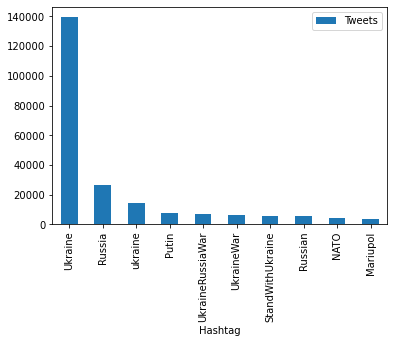

In [ ]:
df_hash_positif = pd.DataFrame(topXItemList_hashtags_Positifs)
df_hash_positif.columns =['Hashtag','Tweets']
df_hash_positif.plot.bar(x='Hashtag', y='Tweets', rot=90)


## Hashtag negatifs

<AxesSubplot:xlabel='Hashtag'>

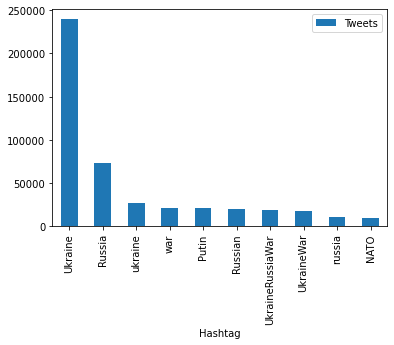

In [ ]:
df_hash_negatifs = pd.DataFrame(topXItemList_hashtags_Negatifs)
df_hash_negatifs.columns =['Hashtag','Tweets']
df_hash_negatifs.plot.bar(x='Hashtag', y='Tweets', rot=90)


# scrapper les tweet de Biden, poutin, zelensky et macron

In [ ]:
queryJB ="(from:POTUS) since:2022-02-01"
queryVP ="(from:KremlinRussia_E) since:2022-02-01"
queryEM ="(from:EmmanuelMacron) since:2022-02-01"
queryVZ ="(from:ZelenskyyUa) since:2022-02-01"
query=[queryJB,queryVP,queryEM,queryVZ]

df_POTUS=[]
df_KremlinRussia_E=[]
df_EmmanuelMacron=[]
df_ZelenskyyUa=[]
presidents=[df_POTUS,df_KremlinRussia_E,df_EmmanuelMacron,df_ZelenskyyUa]

limits =2000
president=0

for query in query:
    tweets = []
    for tweet in scpt.TwitterSearchScraper(query).get_items():

        if len(tweets)==limits :
            break
        else :
            tweets.append([tweet.date, tweet.user.username,tweet.user.displayname,tweet.user.description,tweet.user.followersCount,tweet.user.friendsCount,
                        tweet.user.statusesCount,tweet.user.favouritesCount,tweet.user.listedCount,tweet.user.mediaCount,tweet.user.location,tweet.content,
                        tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.lang,tweet.hashtags])
        
    presidents[president] = pd.DataFrame(tweets, columns = ['Date','Username','displayname','UserDescription','followersCount','friendsCount','statusesCount','favouritesCount',
                                            'listedCount','mediaCount','location','content','replyCount','retweetCount','likeCount','quoteCount','lang','hashtags'])
    president=president+1

df_POTUS=presidents[0]
df_KremlinRussia_E=presidents[1]
df_EmmanuelMacron=presidents[2]
df_ZelenskyyUa= presidents[3]

# Evolution du nombre de tweets/jour des presidents

In [ ]:
# dateTime to date 
for df in presidents:
    df['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
df_count_tweet_POTUS=0
df_count_tweet_KremlinRussia_E=0
df_count_tweet_EmmanuelMacron=0
df_count_tweet_ZelenskyyUa=0
df_count_tweets=[df_count_tweet_POTUS,df_count_tweet_KremlinRussia_E,df_count_tweet_EmmanuelMacron,df_count_tweet_ZelenskyyUa]
i=0
for df_count_tweet in df_count_tweets:
    df_count_tweets[i] = (presidents[i]
          .value_counts('Date',sort = False)
          .rename_axis('Date')
          .reset_index(name='tweet_count'))
    i+=1

df_count_tweet_POTUS=df_count_tweets[0]
df_count_tweet_KremlinRussia_E=df_count_tweets[1]
df_count_tweet_EmmanuelMacron=df_count_tweets[2]
df_count_tweet_ZelenskyyUa=df_count_tweets[3]

In [ ]:
# # definition des x et y 
# dates = df_count_tweet['Date']
# y = df_count_tweet['tweet_count']

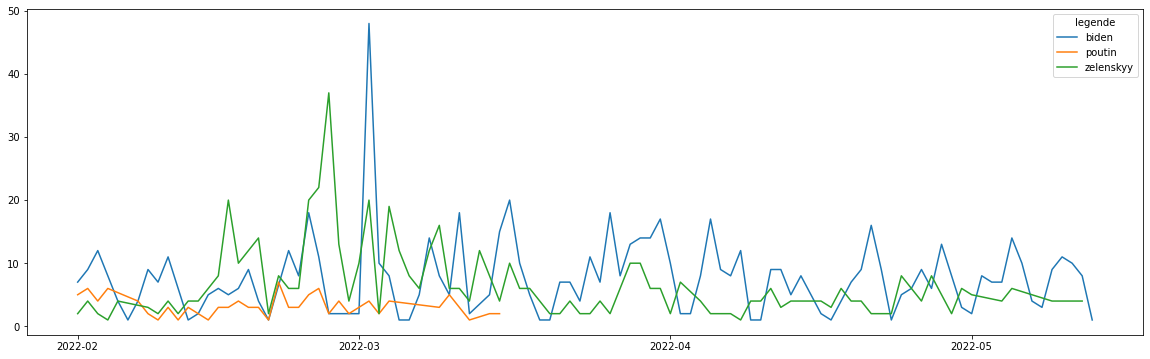

In [ ]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]
df_count_tweets=[df_count_tweet_POTUS,df_count_tweet_KremlinRussia_E,df_count_tweet_ZelenskyyUa]


i=0
fig, ax = plt.subplots(figsize=(20, 6))
for df in presidents:
    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df_count_tweets[i]['Date'], df_count_tweets[i]['tweet_count'])
    legend = plt.legend(nom_presidents, title = 'legende')
    i+=1

# Analyse des sentiments des présisdents 

In [ ]:
afinn = Afinn()

for df in presidents:
    aff=[]
    for sentence in df['content']:
        vs=afinn.score(sentence)
        aff.append(vs)
    df['sentiment']=aff

In [ ]:
# creation de la colonne label (positif , neutre ou negatif)
THRESHOLD = 0.2
for df in presidents:
    conditions = [
        (df['sentiment'] <= -THRESHOLD), 
        (df['sentiment'] > -THRESHOLD) & (df['sentiment'] < THRESHOLD),
        (df['sentiment'] >= THRESHOLD)
    ]

    values = ["neg","neu", "pos"]
    df['label'] = np.select(conditions, values)

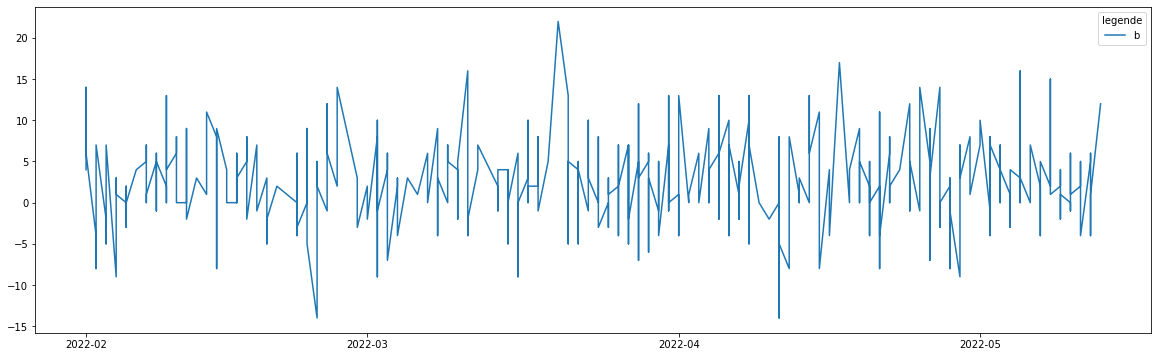

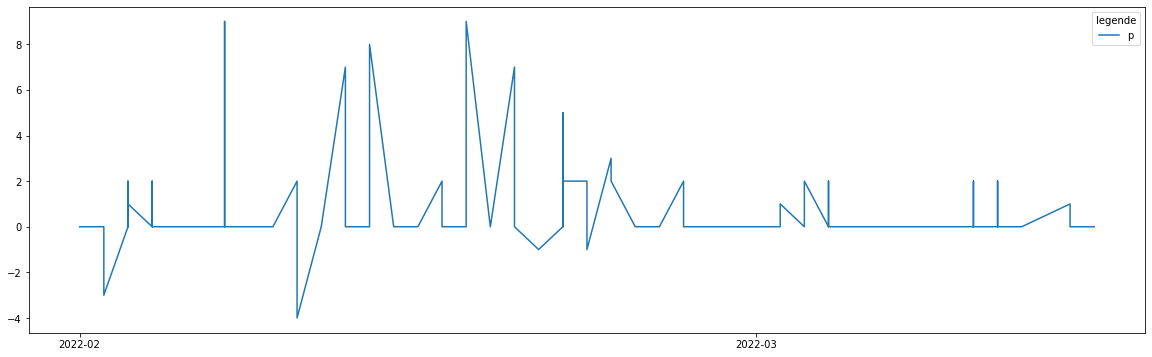

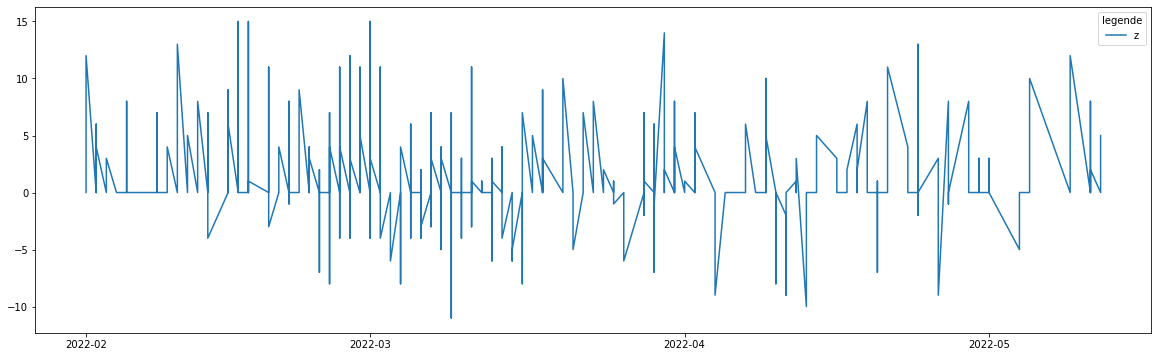

In [ ]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]

i=0
for df in presidents:
    fig, ax = plt.subplots(figsize=(20, 6))

    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df['Date'], df['sentiment'])
    legend = plt.legend(nom_presidents[i], title = 'legende')
    i+=1

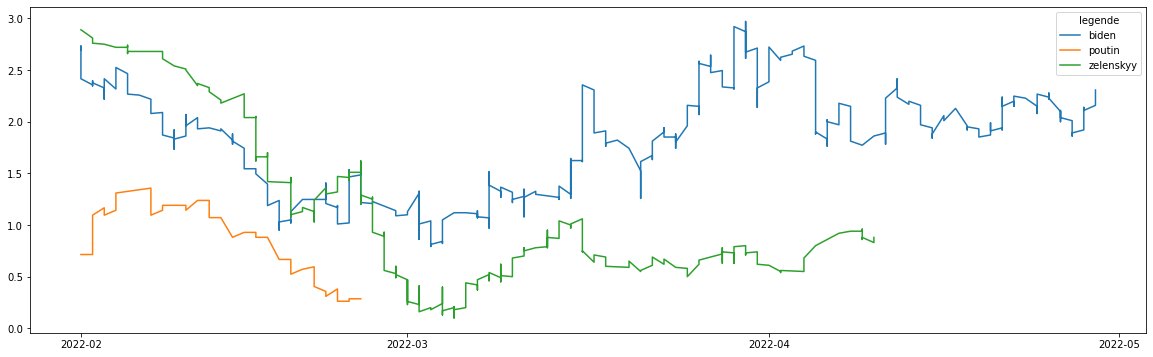

In [ ]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]
fig, ax = plt.subplots(figsize=(20, 6))

for df in presidents:

    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df['Date'], df['sentiment'].rolling((df['Date'].max() - df['Date'].min()).days).mean())
    legend = plt.legend(nom_presidents, title = 'legende')


# tweet pendants les periodes fortes et faibles

In [ ]:
df_POTUS.sort_values(by = 'sentiment', ascending=True)
# df_KremlinRussia_E.sort_values(by = 'sentiment', ascending=True)
# df_ZelenskyyUa.sort_values(by = 'sentiment', ascending=True)

,Date,Username,displayname,UserDescription,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,content,replyCount,retweetCount,likeCount,quoteCount,lang,hashtags,sentiment,label
222,2022-04-11,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22138160,12,3157,0,17941,1012,,"In addition to today’s rule, we’re working in four areas to reduce gun violence:\n \n- Going after rogue gun dealers\n- Disrupting illegal gun trafficking\n- Funding community policing and community violence intervention\n- Funding job training, drug treatment, mental health, and more",2260,2307,12700,259,en,None,-14.0,neg
630,2022-02-24,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22138162,12,3157,0,17941,1012,,The prayers of the world are with the people of Ukraine tonight as they suffer an unprovoked and unjustified attack by Russian military forces. President Putin has chosen a premeditated war that will bring a catastrophic loss of life and human suffering. https://t.co/Q7eUJ0CG3k,11868,31331,123705,5870,en,None,-14.0,neg
577,2022-03-02,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22138165,12,3157,0,17941,1012,,"My predecessor undermined the watchdogs whose job was to keep pandemic relief funds from being wasted.\n \nIn my Administration, the watchdogs are back.\n \nWe’re going after the criminals who stole billions in relief money meant for small businesses and millions of Americans.",694,3076,16132,463,en,None,-9.0,neg
444,2022-03-16,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22138164,12,3157,0,17941,1012,,"Putin is inflicting appalling devastation and horror on Ukraine — bombing apartment buildings and maternity wards. \n \nYesterday, we saw reports that Russian forces were holding hundreds of doctors and patients hostage.\n \nThese are atrocities. It is an outrage to the world.",5419,9244,46352,629,en,None,-9.0,neg
104,2022-04-29,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22138158,12,3157,0,17941,1012,,"Yesterday, Russia threatened two of our allies with a cut off of energy supplies.\n\nLet me be clear: We will not let Russia intimidate or blackmail their way out of sanctions. And we will not allow them to use their oil to avoid consequences for their aggression.",5694,7260,45946,587,en,None,-9.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,2022-05-08,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22138157,12,3157,0,17941,1012,,"Happy Mother’s Day, @FLOTUS. You’re the love of my life and the life of my love. You bring me joy and laughter every day, and I’m so grateful for everything you do for our family. https://t.co/02HU743uFZ",4447,6098,70383,301,en,None,15.0,pos
57,2022-05-05,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22138157,12,3157,0,17941,1012,,"Cinco de Mayo is a day to celebrate freedom and resilience, but it’s also a day to celebrate friendship. I’m grateful for the friendship between the United States and Mexico and for the innumerable contributions that generations of Mexican Americans have made to our nation.",2643,3390,24624,347,en,None,16.0,pos
495,2022-03-11,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22138164,12,3157,0,17941,1012,,"I was honored to welcome my frie

In [ ]:
df_en

,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
100000,169975,snscrape.modules.twitter.Tweet,https://twitter.com/Rishikesh4709/status/1521050658706956288,2022-05-02 08:55:11+00:00,eth rise yesterday bullish revers mani coin start rise best luck crypto btw ethereum lover follow crypto updat 🙂🤞cryptocurr cryptonew btc bitcoin ethereum dog elonmusk ukrain,"#ETH is rising from yesterday, It is a Bullish reversal. Many coins have started to rise. Best of luck #Crypto \nBtw, how are you Ethereum Lovers ? \n: Do follow me for more crypto updates. 🙂🤞\n#cryptocurrency #CryptoNews #BTC #Bitcoin #Ethereum #dogs #ElonMusk #Ukraine https://t.co/bFhN4asMrf",1521050658706956288,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Rishikesh4709', 'id': 1503430291591135238, 'displayname': 'Rishikesh Raj', 'description': ': Look at me; God must have a bad sense of humor!\n\n : cryptocurrency lover ❤ #BTC #ETH #DOGE #SHIB', 'rawDescription': ': Look at me; God must have a bad sense of humor!\n\n : cryptocurrency lover ❤ #BTC #ETH #DOGE #SHIB', 'descriptionUrls': None, 'verified': False, 'created': '2022-03-14T17:58:36+00:00', 'followersCount': 75, 'friendsCount': 110, 'statusesCount': 222, 'favouritesCount': 3654, 'listedCount': 2, 'mediaCount': 50, 'location': 'Dreamland', 'protected': False, 'linkUrl': 'https://instagram.com/rishikesh_1136?igshid=YmMyMTA2M2Y=', 'linkTcourl': 'https://t.co/EJHQXkE7yM', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1504879720449466368/gVXGskUW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1503430291591135238/1650371618', 'label': None, 'url': 'https://twitter.com/Rishikesh4709'}",2,0,...,2022-03-14T17:58:36+00:00,50,2,3654,222,110,75,Dreamland,8.0,pos
100001,169976,snscrape.modules.twitter.Tweet,https://twitter.com/Front_News_eu/status/1521050646845267969,2022-05-02 08:55:08+00:00,addit sourc gas ukrain get access lngtermin baltic state poland,Additional source of #gas: #Ukraine will get access to LNG-terminals of the #Baltic states and #Poland \nfrontnews.eu/en/news/detail…,1521050646845267969,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Front_News_eu', 'id': 918574273, 'displayname': 'Front News Ukraine', 'description': 'Breaking news daily\n\nConnect with us on telegram: t.me/frontnews_eu', 'rawDescription': 'Breaking news daily\n\nConnect with us on telegram: https://t.co/atfpFtvMaS', 'descriptionUrls': [{'text': 't.me/frontnews_eu', 'url': 'http://t.me/frontnews_eu', 'tcourl': 'https://t.co/atfpFtvMaS', 'indices': [50, 73]}], 'verified': False, 'created': '2012-11-01T08:50:47+00:00', 'followersCount': 1269, 'friendsCount': 8, 'statusesCount': 53594, 'favouritesCount': 221, 'listedCount': 17, 'mediaCount': 716, 'location': 'Ukraine', 'protected': False, 'linkUrl': 'https://frontnews.eu/en/', 'linkTcourl': 'https://t.co/VKuawIrZhA', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1422866001595617282/au4yv4nz_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/918574273/1502461868', 'label': None, 'url': 'https://twitter.com/Front_News_eu'}",0,0,...,2012-11-01T08:50:47+00:00,716,17,221,53594,8,1269,Ukraine,0.0,neu
100002,169977,snscrape.modules.twitter.Tweet,https://twitter.com/hrealities/status/1521050640268468224,2022-05-02 08:55:07+00:00,full interview with russia foreign minist sergey lavrov view ukrain still watch,Full interview with Russia’s Foreign Minister Sergey Lavrov youtu.be/_DwOZOaJfY4 #view #ukraine ( still watching ),1521050640268468224,"{'_type': 'snscrape.modules.twitter.User', 'username': 'hrealities', 'id': 127228163, 'displayname': 'Julia Pichler', 'description': 'Strategic Empowering Information Design #Transitioning 2 Fairness&Abundance 4ALL = #p2p… dancer@heart, obviously no online socialiser', 'rawDescription': 'Strategic Empowering Information Design #Tra

In [21]:
df_ru = df[df.lang == 'ru'].drop('lang', axis=1)

In [23]:
df_ru

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
8,snscrape.modules.twitter.Tweet,https://twitter.com/falsemirro_r/status/1526196267382198274,2022-05-16 13:42:00+00:00,Вы и так знатно защеку берете)))\n#Україна #Ukraine #UkraineUnderAttack #UkranianArmy #ВСУ #ЗСУ #украина https://t.co/k1wbAUf6aR,Вы и так знатно защеку берете)))\n#Україна #Ukraine #UkraineUnderAttack #UkranianArmy #ВСУ #ЗСУ #украина https://t.co/k1wbAUf6aR,1526196267382198274,"{'_type': 'snscrape.modules.twitter.User', 'username': 'falsemirro_r', 'id': 1217382497027346433, 'displayname': 'Салтыков-Щедрин', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2020-01-15T09:46:29+00:00', 'followersCount': 4, 'friendsCount': 9, 'statusesCount': 526, 'favouritesCount': 187, 'listedCount': 0, 'mediaCount': 144, 'location': 'Frankfurt am Main, Deutschland', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1524278254659674112/I-pVHkZt_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1217382497027346433/1652251214', 'label': None, 'url': 'https://twitter.com/falsemirro_r'}",0,0,0,...,Салтыков-Щедрин,,2020-01-15T09:46:29+00:00,144,0,187,526,9,4,"Frankfurt am Main, Deutschland"
87,snscrape.modules.twitter.Tweet,https://twitter.com/Odessa_Novosti/status/1526195276964241408,2022-05-16 13:38:04+00:00,Думская → Одесская каратистка завоевала золото международного турнира (фото) https://t.co/4quQWud00U новини Одеса #новини #odessa #ukraine https://t.co/Oe5XMnN4cy,Думская → Одесская каратистка завоевала золото международного турнира (фото) dlvr.it/SQShBl новини Одеса #новини #odessa #ukraine https://t.co/Oe5XMnN4cy,1526195276964241408,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Odessa_Novosti', 'id': 63427623, 'displayname': 'ODESA ⚓ NEWS 🇺🇦', 'description': 'Всі #новини ⚓ очима одеситів: суспільно-політичні, #бізнес, #культура. All #Odesa, #Ukraine #news: business, politics, social & other.', 'rawDescription': 'Всі #новини ⚓ очима одеситів: суспільно-політичні, #бізнес, #культура. All #Odesa, #Ukraine #news: business, politics, social & other.', 'descriptionUrls': None, 'verified': False, 'created': '2009-08-06T09:18:48+00:00', 'followersCount': 8759, 'friendsCount': 241, 'statusesCount': 458943, 'favouritesCount': 6120, 'listedCount': 262, 'mediaCount': 30732, 'location': 'Odesa, Ukraine', 'protected': False, 'linkUrl': 'http://OdessaNews.biz/', 'linkTcourl': 'https://t.co/TpzF5YCZo7', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/351340396/Odessa-Ukraine-city-Black-Sea-tourism_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/63427623/1465838430', 'label': None, 'url': 'https://twitter.com/Odessa_Novosti'}",0,0,0,...,ODESA ⚓ NEWS 🇺🇦,"Всі #новини ⚓ очима одеситів: суспільно-політичні, #бізнес, #культура. All #Odesa, #Ukraine #news: business, politics, social & other.",2009-08-06T09:18:48+00:00,30732,262,6120,458943,241,8759,"Odesa, Ukraine"
180,snscrape.modules.twitter.Tweet,https://twitter.com/rogue_corq/status/1526194023697772544,2022-05-16 13:33:05+00:00,Россия заявила о начале эвакуации раненых с «Азовстали» https://t.co/lA8mL6uhUF #Ukraine #Russia,Россия заявила о начале эвакуации раненых с «Азовстали» inforesist.org/rossiya-zayavi… #Ukraine #Russia,1526194023697772544,"{'_type': 'snscrape.modules.twitter.User', 'username': 'rogue_corq', 'id': 838321345570156545, 'displayname': '🇺🇦🐱🖤🕊️ VAXXED THO 🏳️‍🌈🖤🐱🇺🇦', 'description': '@corq's part-time snark account. #cyber #linux #agitprop #counterintel #cats #Україна 🇺🇦 Currently in full #Ukraine News mode 🇺🇦 All cats retweeted.', 'rawDescription': '@corq's part-time snark account. #cyber #linux #agitprop #counterintel #cats #Україна 🇺🇦 Currently in full #Ukraine News mode 🇺🇦 All cats retweeted.', 'd

In [28]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
tokens = tokenizer.split('всё очень плохо')  # [('всё', None), ('очень', None), ('плохо', None)]

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = df.content

results = model.predict(messages, k=1)

for message, sentiment in zip(messages, results):
    # привет -> {'speech': 1.0000100135803223, 'skip': 0.0020607432816177607}
    # люблю тебя!! -> {'positive': 0.9886782765388489, 'skip': 0.005394937004894018}
    # малолетние дебилы -> {'negative': 0.9525841474533081, 'neutral': 0.13661839067935944}]
    print(message, '->', sentiment)